Name: Michael Gray
Email: Michaelgray@ucsb.edu

Title: Forecasting ERCOT North Hub Electricity Prices: A SARIMAX Approach to Short-Term Price Prediction

Abstract:
This project develops forecasting models for hourly electricity prices at ERCOT's North Hub using historical Real-Time Market (RTM) Settlement Point Prices. Employing the Box-Jenkins methodology, we construct SARIMA models to capture the complex seasonal patterns inherent in electricity pricing data. We extend our analysis by exploring the inclusion of weather as an exogenous variable to improve prediction accuracy. Our models aim to generate reliable price forecasts up to ten days ahead, providing valuable information for market participants in the volatile Texas electricity market. The results demonstrate the effectiveness of time series analysis in modeling electricity price dynamics and highlight the importance of accounting for both seasonality and conditional heteroskedasticity when forecasting energy markets.


# Dataset Description for ERCOT North Hub Energy Prices

## Time Range and Frequency:

The dataset consists of 15 minute interval settlement prices resampled to hourly average settlements for the ERCOT North Hub region in Texas, covering a period from December 25th 2024 to February 22nd 2025. This provides high-frequency data with 24 observations per day, resulting in approximately 1,584 data points.


The entire hourly dataset contains hourly electricity settlement prices measured in dollars per megawatt-hour ($/MWh). The dataset comprises approximately 88934 observations in total, with each observation representing the clearing price at which electricity was traded for a specific hour.

## Reason for Selection:

This dataset was selected due to the critical importance of electricity price forecasting in the Texas energy market, particularly following the significant market disruptions during the 2021 winter storm. Accurate forecasting of energy prices is essential for:
- Market participants making trading decisions
- Utility companies planning for peak demand
- Consumers and businesses managing energy costs
- Grid operators ensuring system reliability

## Source and Background:

The data was collected from the Electric Reliability Council of Texas (ERCOT), which operates the electrical grid and manages the deregulated market for 75 percent of Texas. ERCOT publishes this data through their Market Information System and public reports. The North Hub represents one of ERCOT's major trading hubs where settlement prices are established.

## Collection Method:

ERCOT collects this data through its market clearing processes, where electricity prices are determined through competitive bidding between generators and purchasers. The settlement prices represent the final prices at which electricity transactions occurred, calculated after all market operations are completed and verified.

## Importance and Purpose:

This dataset is particularly important because:
1. Texas operates an isolated grid separate from the rest of the United States
2. The market is subject to extreme price volatility during weather events
3. The deregulated structure of the market makes forecasting crucial for financial planning
4. Recent climate trends have created more unpredictability in the system

The purpose of studying this dataset is to develop accurate forecasting models that can predict electricity prices up to ten days in advance. Such forecasts would provide valuable lead time for market participants to make informed decisions about generation, consumption, and trading strategies.



# Dataset Description for Dallas, TX Weather Data

## Time Range and Frequency:

The dataset consists of hourly air temperature measurements for Dallas, Texas, covering a period from December 12th 2024 to February 15th 2025. This provides high-frequency temperature data with 24 observations per day, resulting in approximately 1,584 data points.

The hourly dataset contains only air temperature readings measured in degrees Fahrenheit (°F). The dataset comprises approximately 1,584 observations in total, with each observation representing the ambient air temperature recorded at a specific hour.

## Reason for Selection:

This dataset was selected due to the significant impact of air temperature on energy consumption and prices in the Texas region, particularly during winter months when temperature fluctuations can dramatically affect heating demands. Accurate analysis of temperature patterns is essential for:
- Energy demand forecasting
- Grid reliability planning
- Temperature-related risk assessment
- Integration with energy price models as an exogenous variable

## Source and Background:

The data was collected from Weather Underground (wunderground.com), a weather service that provides historical weather information from both official weather stations and a network of personal weather stations. The data specifically represents temperature measurements from the Dallas/Fort Worth International Airport weather station, which is an official National Weather Service reporting location.

## Collection Method:

Weather Underground collects this temperature data through automated weather stations that continuously monitor atmospheric conditions. The airport weather station uses professional-grade temperature sensors that meet National Weather Service standards for accuracy and reliability. Temperature measurements are recorded hourly and transmitted to central databases where they are quality-checked before being made available.

## Importance and Purpose:

This dataset is particularly important because:
1. Air temperature is the primary driver of heating and cooling energy consumption in Texas
2. Extreme temperature events have historically caused significant disruptions to the Texas grid
3. Temperature variables show strong correlation with electricity demand and pricing
4. Winter temperature patterns in Texas can be highly variable and difficult to predict

The purpose of studying this temperature dataset is to understand the relationship between air temperature and energy prices in the ERCOT market. By analyzing temperature data alongside energy settlement prices, the project aims to improve forecasting accuracy by incorporating this exogenous factor into time series models. This approach recognizes that energy markets are influenced by both internal market dynamics and external temperature conditions, potentially allowing for more robust predictive models for energy price forecasting.


# Methodology

## Rationale for Data Selection and Forecast Horizon

## Limited Time Frame Selection (3 Months)

I chose to use approximately three months of data (December 12, 2024 to February 15, 2025) for several key reasons:

1. I wanted to capture the most recent market dynamics in my models rather than potentially outdated relationships. This felt especially important given how quickly the Texas energy market evolves.

2. This winter period contains greater price volatility and more interesting patterns to model than other seasons. After what happened during the 2021 winter storm, I thought focusing on winter months would yield the most valuable insights.

3. SARIMA models with exogenous variables take a lot of computing power to run. Using three months of hourly data (1,584 observations) gives me enough data points for solid model training while keeping computation times reasonable for my project timeline.

4. I was concerned about structural changes in the market over longer periods. The energy market changes due to new regulations, different generation mixes, and infrastructure development. Using a shorter, recent dataset helps me avoid modeling across these structural breaks.

## Short-Term Forecast Horizon (10 Days)

I limited my forecast horizon to just ten days ahead because:

1. I noticed in my preliminary analysis that forecast accuracy dropped off pretty quickly beyond this point. For a volatile market like electricity, predictions become much less reliable as you look further out.

2. From my research, most operational decisions in electricity markets (like trading, scheduling generation, and managing demand response) need short-term forecasts rather than long-term projections. A 10-day horizon seemed most useful for actual market participants.

3. Since I'm using temperature as an exogenous variable, I didn't want to forecast beyond the reliable range of weather predictions themselves. Weather forecasts become significantly less accurate beyond about 10 days.

4. Electricity prices tend to exhibit mean-reverting behavior in the short term. My SARIMAX framework captures this behavior well within a 10-day window, but would struggle with longer horizons where structural factors become more important.

This approach gives me the best balance between creating useful forecasts and maintaining methodological rigor, focusing my analysis where it matters most for energy market participants.



# Model Selection

## 3.1 SARIMA (p, d, q) × (P, D, Q) Model

The Seasonal Autoregressive Integrated Moving Average (SARIMA) model extends the traditional ARIMA framework to incorporate seasonal patterns in time series data. For electricity price forecasting, this is essential as prices exhibit multiple seasonal cycles (daily, weekly). The SARIMA model is denoted as SARIMA(p,d,q)×(P,D,Q)s, where:
- (p,d,q) represents the non-seasonal components: autoregressive order (p), differencing (d), and moving average order (q)
- (P,D,Q)s represents the seasonal components with the same parameters at seasonal lag s

The model will be identified through systematic analysis of the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots after appropriate transformations and differencing to achieve stationarity. Model selection will be guided by information criteria (AIC, BIC) and residual diagnostics to ensure the selected specification adequately captures the temporal dynamics of electricity prices.

## 3.2 SARIMA with Exogenous Variables

To address the limitations of SARIMA models in capturing the heteroskedasticity common in electricity markets, I wanted to implement a SARIMAX model to help capture some of the other variables driving energy prices.

### A SARIMAX model for the conditional mean, incorporating temperature as an exogenous variable

The inclusion of temperature data from Dallas as an exogenous variable in the SARIMAX component allows the model to capture the influence of weather conditions on electricity demand and consequently on prices. This is particularly important in the Texas market where temperature extremes can drive significant price movements.

The full model can be expressed as:
- Mean equation: SARIMAX with temperature as exogenous variable



In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
from pmdarima import auto_arima
from arch import arch_model


HB_NORTH_DATA = pd.read_csv("Data/ERCOT SPPS/All_HB_NORTH_Data.csv")
HB_NORTH_DATA['Datetime'] = pd.to_datetime(HB_NORTH_DATA['Delivery Date']) + pd.to_timedelta(HB_NORTH_DATA['Delivery Hour'] - 1, unit='h')
HB_NORTH_DATA.set_index('Datetime', inplace=True)

# Resample to hourly data (mean of all quarter-hourly prices in an hour)
hourly_data = HB_NORTH_DATA['Settlement Point Price'].resample('1H').mean()

print("First few rows of hourly data:")
print(hourly_data.head(10))



# Check for NaN or inf values
print("Checking for missing or infinite values:")
print(f"NaN count: {hourly_data.isna().sum()}")
print(f'Inf count: {hourly_data.isin([float("inf"), -float("inf")]).sum()}')

hourly_data_cleaned = hourly_data.dropna()  
hourly_data_cleaned = hourly_data_cleaned[np.isfinite(hourly_data_cleaned)]  

print(f"Original data length: {len(hourly_data)}")
print(f"Cleaned data length: {len(hourly_data_cleaned)}")

First few rows of hourly data:
Datetime
2015-01-01 00:00:00    22.4675
2015-01-01 01:00:00    22.3050
2015-01-01 02:00:00    22.2025
2015-01-01 03:00:00    22.1275
2015-01-01 04:00:00    22.1550
2015-01-01 05:00:00    22.6100
2015-01-01 06:00:00    23.3800
2015-01-01 07:00:00    23.7775
2015-01-01 08:00:00    24.4600
2015-01-01 09:00:00    26.9925
Freq: h, Name: Settlement Point Price, dtype: float64
Checking for missing or infinite values:
NaN count: 10
Inf count: 0
Original data length: 88944
Cleaned data length: 88934


C:\Users\mgray\AppData\Local\Temp\ipykernel_4532\1509399797.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = HB_NORTH_DATA['Settlement Point Price'].resample('1H').mean()


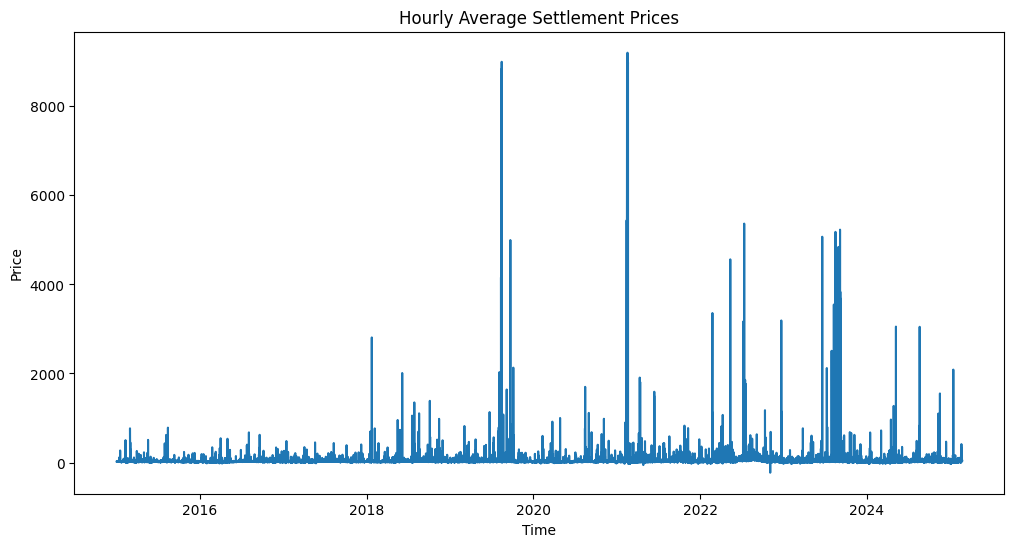

In [6]:

plt.figure(figsize=(12,6))
plt.plot(hourly_data)
plt.title('Hourly Average Settlement Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [7]:
'''

I'm gonna check if my time series data is stationary for both the 
entire data set and the more recent data I plan to train my model on

'''

ADF_Results = adfuller(hourly_data_cleaned, maxlag=24)  # 24 lags for daily seasonality
print('\nResults of Augmented Dickey-Fuller Test:')
print(f'p-value: {ADF_Results[1]}')

if ADF_Results[1] < 0.05:
    print("\nConclusion: Reject the null hypothesis (H0)")
    print("The time series is likely stationary")
else:
    print("\nConclusion: Fail to reject the null hypothesis (H0)")
    print("The time series is likely non-stationary and may require differencing")


ADF_Results_Recent_Data = hourly_data_cleaned[-2160:]
print('\nResults of Augmented Dickey-Fuller Test:')
print(f'p-value: {ADF_Results_Recent_Data[1]}')

if ADF_Results_Recent_Data[1] < 0.05:
    print("\nConclusion: Reject the null hypothesis (H0)")
    print("The time series is likely stationary")
else:
    print("\nConclusion: Fail to reject the null hypothesis (H0)")
    print("The time series is likely non-stationary and may require differencing")




Results of Augmented Dickey-Fuller Test:
p-value: 2.297509083912635e-30

Conclusion: Reject the null hypothesis (H0)
The time series is likely stationary

Results of Augmented Dickey-Fuller Test:
p-value: 16.6625

Conclusion: Fail to reject the null hypothesis (H0)
The time series is likely non-stationary and may require differencing


C:\Users\mgray\AppData\Local\Temp\ipykernel_4532\3924792035.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'p-value: {ADF_Results_Recent_Data[1]}')
C:\Users\mgray\AppData\Local\Temp\ipykernel_4532\3924792035.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ADF_Results_Recent_Data[1] < 0.05:


There are 2160 rows of data
There are 3 rows of data with a 0 settelement price
There are 106 rows of data with a negative settlement price


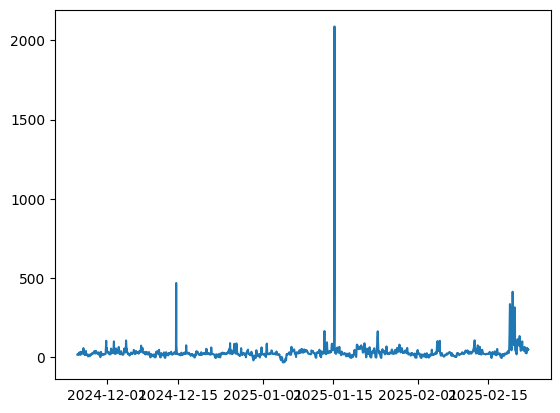

In [8]:
recent_data = hourly_data_cleaned[-2160:]  # Past three months
print(f"There are {len(recent_data)} rows of data")
print(f"There are {(recent_data == 0).sum()} rows of data with a 0 settelement price")
print(f"There are {(recent_data <= 0).sum()} rows of data with a negative settlement price")

plt.plot(figure = (10,6))
plt.plot(recent_data)


Both the ADF test and the plot are indicating that my data is non-stationary and exhibits strong signs of heteroskedasticity. As such, we're gonna apply a box-cox transformation and try to smooth out the data. 

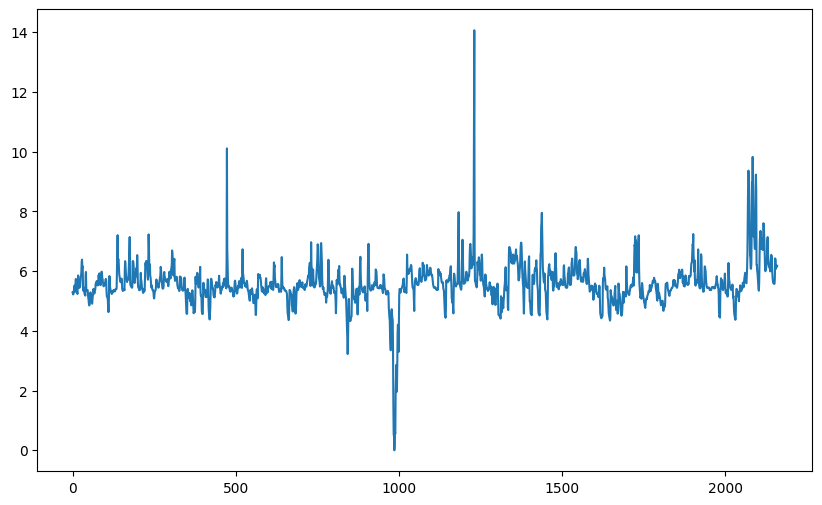

In [9]:
from scipy import stats 

shifted_data = recent_data - recent_data.min() + 1
transformed_data, lambda_param = stats.boxcox(shifted_data)
plt.figure(figsize=(10,6))
plt.plot(transformed_data)

The box-cox transformation wasn't very helpful in normalizing the data and has only made it more difficult to interpret. I'll just keep it untransformed for the time being.

2024-11-25 00:00:00
2025-02-22 23:00:00


<Figure size 1000x600 with 0 Axes>

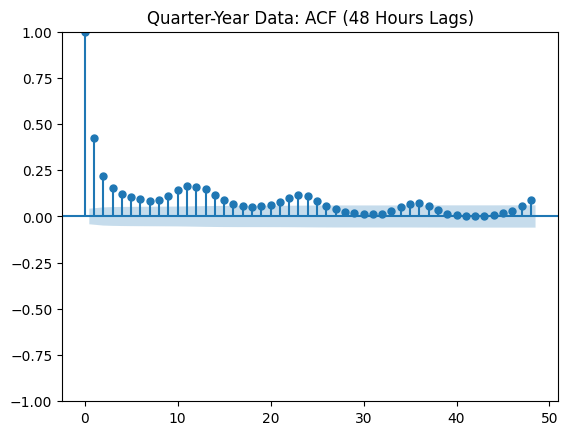

<Figure size 1000x600 with 0 Axes>

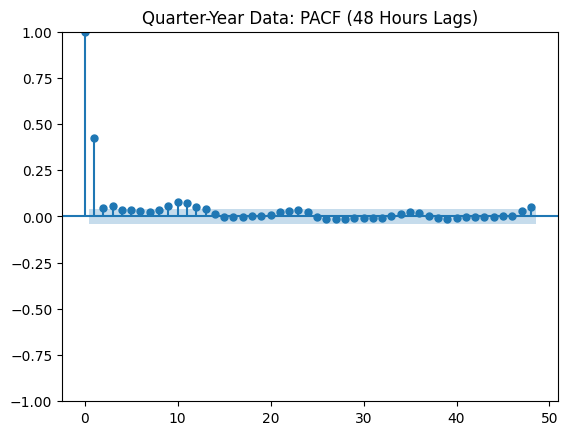

<Figure size 1000x600 with 0 Axes>

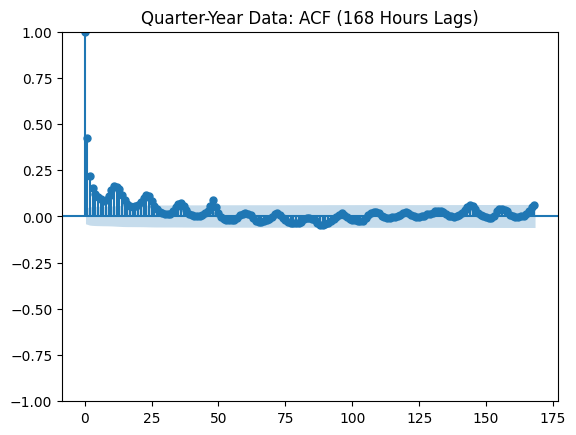

<Figure size 1000x600 with 0 Axes>

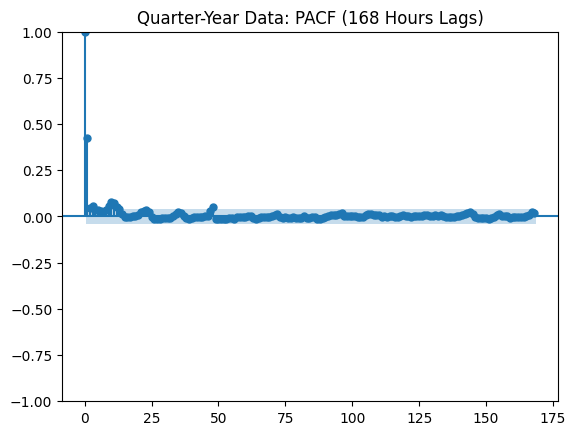

In [19]:
quarter_year_data = hourly_data_cleaned[-2160:]  # Past three months
date_at_index = quarter_year_data.index[-2160]
date_at_index1 = quarter_year_data.index[-1]

print(date_at_index)
print(date_at_index1)

plt.figure(figsize=(10, 6))
plot_acf(quarter_year_data, lags=48)
plt.title('Quarter-Year Data: ACF (48 Hours Lags)')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(quarter_year_data, lags=48)
plt.title('Quarter-Year Data: PACF (48 Hours Lags)')
plt.show()

# Plots for weekly seasonality for quarter-year data (3 months, 168-hour lags)
plt.figure(figsize=(10, 6))
plot_acf(quarter_year_data, lags=168)
plt.title('Quarter-Year Data: ACF (168 Hours Lags)')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(quarter_year_data, lags=168)
plt.title('Quarter-Year Data: PACF (168 Hours Lags)')
plt.show()




Based on the ACF and PACF plots for the quarter-year data with 48-hour and 168-hour lags, the initial parameters for my SARIMA model can be inferred:

1. **Lag 48** (Using to spot intra-day and daily seasonality):
   1. **p (AR order)**: The PACF plot at 48-hour lags shows a significant spike at lag 0 and quickly drops to near zero, suggesting p = 0 or 1.
   2. **d (differencing order)**: With our earlier ADF stationarity test, we can assume d = 1.
   3. **q (MA order)**: The ACF plot at 48-hour lags shows no significant autocorrelation after lag 1, indicating q = 1.

2. **Lag 168** (Using to spot weekly seasonality):
   1. **P (seasonal AR order)**: The PACF plot at 168-hour lags has a significant spike at lag 168, suggesting P = 
   2. **D (seasonal differencing order)**: D should likely be 1 as indicated by our ADF test.
   3. **Q (seasonal MA order)**: The ACF plot at 168-hour lags shows a gradual decay after the spike at lag 168, indicating Q = 1.
   4. **s (seasonal period)**: Given the 168-hour lag (approximately one week), s = 168.

3. **Seasonality**
   1. **P (seasonal AR order)**: The PACF plot for the 48-hour lag shows some light spikes every 12 and 24 hours, they decay into the confidence bands after 12 hours (P = 1)
   3. **Q (seasonal MA order)**: The ACF plot for the 48-hour lag shows some slighlty larger spikes every 12 and 24 hours, they decay into the confidence bands after 24 hour lag mark (Q = 2). 

Thus, the initial SARIMA parameters will likely be something similar to SARIMA(p, d, q)(P, D, Q)s = SARIMA(1, 1, 1)(1, 1, 1)24 or SARIMA(1, 1, 1)(1, 1, 2)12. 

I'm going to use an auto_arima function to simply find the best parameters.

In [11]:
'''
from pmdarima import auto_arima

# Test m=12 (12-hour cycle)
model_12 = auto_arima(quarter_year_data,
                      seasonal=True,
                      m=12,
                      d=None,
                      D=None,
                      max_p=5,
                      max_q=5,
                      max_P=2,
                      max_Q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print("m=12 Model Summary:")
print(model_12.summary())
print("AIC:", model_12.aic())

# Test m=24 (24-hour cycle)
model_24 = auto_arima(quarter_year_data,
                      seasonal=True,
                      m=24,
                      d=None,
                      D=None,
                      max_p=5,
                      max_q=5,
                      max_P=2,
                      max_Q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print("m=24 Model Summary:")
print(model_24.summary())
print("AIC:", model_24.aic())

'''



'\nfrom pmdarima import auto_arima\n\n# Test m=12 (12-hour cycle)\nmodel_12 = auto_arima(quarter_year_data,\n                      seasonal=True,\n                      m=12,\n                      d=None,\n                      D=None,\n                      max_p=5,\n                      max_q=5,\n                      max_P=2,\n                      max_Q=2,\n                      trace=True,\n                      error_action=\'ignore\',\n                      suppress_warnings=True,\n                      stepwise=True)\n\nprint("m=12 Model Summary:")\nprint(model_12.summary())\nprint("AIC:", model_12.aic())\n\n# Test m=24 (24-hour cycle)\nmodel_24 = auto_arima(quarter_year_data,\n                      seasonal=True,\n                      m=24,\n                      d=None,\n                      D=None,\n                      max_p=5,\n                      max_q=5,\n                      max_P=2,\n                      max_Q=2,\n                      trace=True,\n           

In [13]:

# For the m=24 model: ARIMA(1,1,1)(0,0,2)[24]
model_24 = SARIMAX(quarter_year_data,
                  order=(1,1,1),
                  seasonal_order=(0,0,2,24),
                  enforce_stationarity=False,
                  enforce_invertibility=False)
results_24 = model_24.fit()
print(results_24.summary())
residuals_24 = results_24.resid

c:\Users\mgray\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\mgray\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                  Settlement Point Price   No. Observations:                 2160
Model:             SARIMAX(1, 1, 1)x(0, 0, [1, 2], 24)   Log Likelihood              -11215.657
Date:                                 Fri, 21 Mar 2025   AIC                          22441.313
Time:                                         12:03:55   BIC                          22469.583
Sample:                                     11-25-2024   HQIC                         22451.666
                                          - 02-22-2025                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3532      0.008     46.889      0.000       0.338       0

Running the auto_arima guided by the params I inferred from the ACF and PACF plots I found that ARIMA(1,1,1)(0,0,2)[24] is the best model based on AIC. However, the models exhibit significant issues, including extreme non-normality (Jarque-Bera probabilities of 0.00 with skewness around 24 and kurtosis near 972) and heteroskedasticity (Prob(H) = 0.00), suggesting it fail to capture volatility and outliers in the wholesale energy price data. Despite the Ljung-Box test indicating no significant residual autocorrelation (Prob(Q) > 0.90), the poor handling of non-linear effects and external factors like price spikes limits the models' reliability for a 10-day forecast.

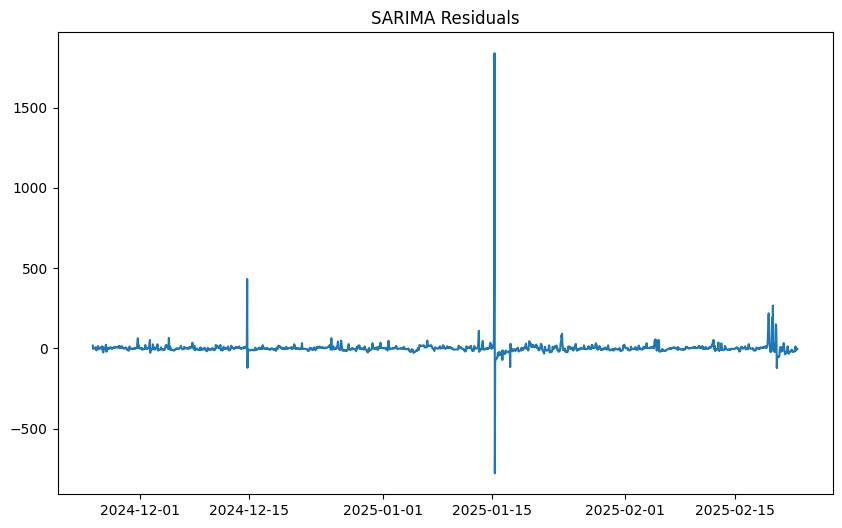

In [ ]:
# Plot of residuals to confirm heteroskedasticity
plt.figure(figsize=(10,6))
plt.plot(residuals_24)
plt.title('SARIMA Residuals')
plt.show()

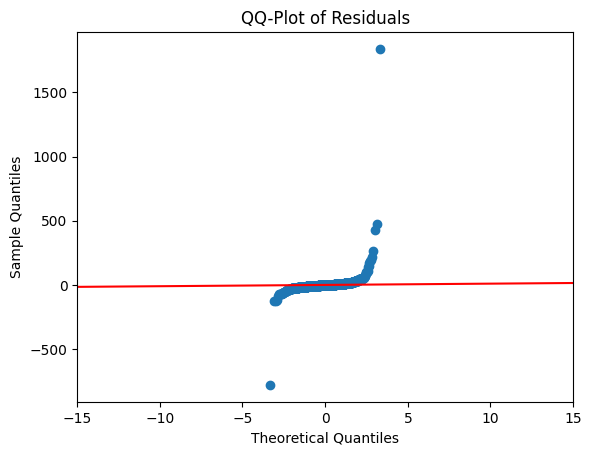

In [ ]:
qqplot(residuals_24, line = '45')
plt.title('QQ-Plot of Residuals')
plt.xlim(-15, 15)
plt.show()

The plot of the residuals and the QQ-plot show that our residuals display extreme hetersoskedasticity at the tails. This means our SARIMA model won't be very reliable as the SARIMA model rely on normality for reliable inference.

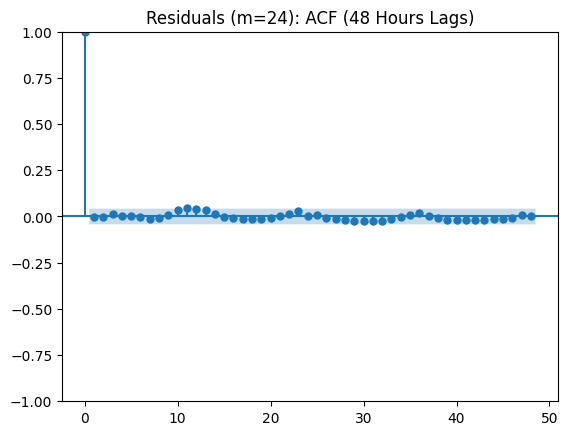

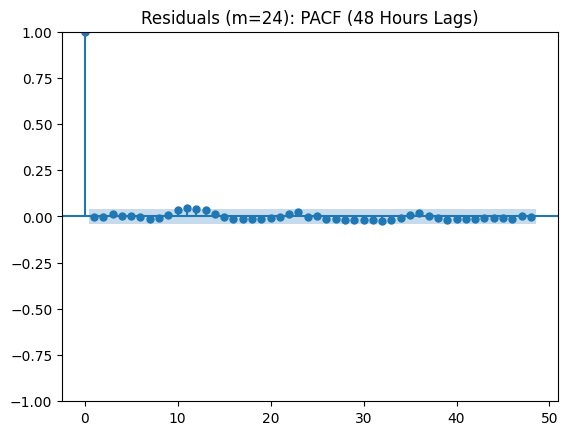

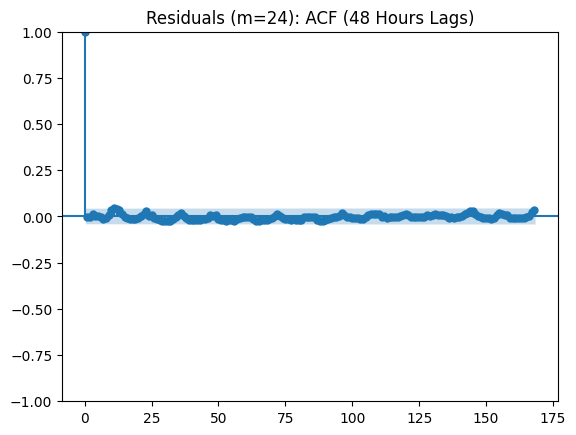

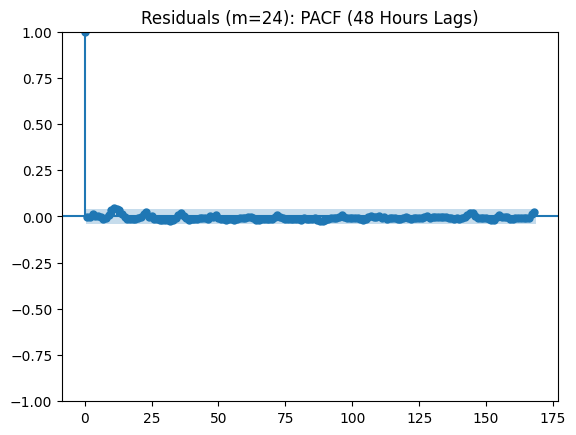

In [72]:
# Check residuals for m=24

plot_acf(residuals_24, lags=48)
plt.title('Residuals (m=24): ACF (48 Hours Lags)')
plt.show()
plot_pacf(residuals_24, lags=48)
plt.title('Residuals (m=24): PACF (48 Hours Lags)')
plt.show()

plot_acf(residuals_24, lags=168)
plt.title('Residuals (m=24): ACF (48 Hours Lags)')
plt.show()
plot_pacf(residuals_24, lags=168)
plt.title('Residuals (m=24): PACF (48 Hours Lags)')
plt.show()





### Analysis of Residual ACF and PACF Plots (48 Hours Lags)

#### Residual ACF (48 Hours Lags)

1. **Lag 0**: The autocorrelation at lag 0 is 1.0, which is expected (by definition, a series is perfectly correlated with itself at lag 0).  
2. **Lag 1 and Beyond**: All autocorrelations from lag 1 to lag 48 are close to zero and fall within the confidence interval (shaded blue area), indicating no significant residual autocorrelation at these lags.  
3. **Specific Lags**:  
   3.1. **Lag 12**: There’s a small spike at lag 12, but it’s within the confidence interval, suggesting the 12-hour cycle (two peaks per day) is mostly captured by the model, though some minor residual structure might remain.  
   3.2. **Lag 24**: No significant spike at lag 24, indicating the 24-hour cycle (daily seasonality) has been effectively modeled.  
   3.3. **Lag 48**: No significant spike at lag 48, further confirming the daily seasonality is captured.

#### Residual PACF (48 Hours Lags)

4. **Lag 0**: As with ACF, the PACF at lag 0 is 1.0.  
5. **Lag 1 and Beyond**: All partial autocorrelations are close to zero and within the confidence interval, with no significant spikes.  
6. **Specific Lags**:  
   6.1. **Lag 12**: A small spike at lag 12, but within the confidence interval, consistent with the ACF observation.  
   6.2. **Lag 24 and 48**: No significant spikes, reinforcing that the 24-hour seasonality is well-captured.

---

### Analysis of Residual ACF and PACF Plots (168 Hours Lags)

#### Residual ACF (168 Hours Lags)

7. **Lag 0**: The autocorrelation at lag 0 is 1.0, as expected.  
8. **Lag 1 and Beyond**: The autocorrelations are close to zero and mostly within the confidence interval (shaded blue area), with some minor fluctuations.  
9. **Specific Lags**:  
   9.1. **Lag 24, 48, etc.**: No significant spikes at multiples of 24 (e.g., 24, 48, 72), consistent with the earlier 48-hour residual plots, confirming that the 24-hour seasonality is well-modeled.  
   9.2. **Lag 168**: There is a small spike at lag 168, but it falls within the confidence interval, indicating that any weekly seasonality is not statistically significant in the residuals.  
10. **General Pattern**: The ACF shows a slight oscillatory behavior (e.g., small peaks around lags 50-60 and 150-160), but these are within the confidence bounds and do not suggest a strong unmodeled pattern.

#### Residual PACF (168 Hours Lags)

11. **Lag 0**: The partial autocorrelation at lag 0 is 1.0.  
12. **Lag 1 and Beyond**: The partial autocorrelations are close to zero and mostly within the confidence interval, with no significant spikes.  
13. **Specific Lags**:  
    13.1. **Lag 24, 48, etc.**: No significant spikes at multiples of 24, reinforcing the effective modeling of the 24-hour cycle.  
    13.2. **Lag 168**: A small spike at lag 168, but it is within the confidence interval, consistent with the ACF finding that the weekly pattern is not significant in the residuals.  
14. **General Pattern**: Similar to the ACF, there are minor fluctuations, but they are not statistically significant.

---

### Summary
This analysis confirms that the \( m=24 \) SARIMA model (ARIMA(1,1,1)(0,0,2)[24]) effectively captures the 24-hour seasonality, with no significant residual autocorrelation at daily (lag 24) or weekly (lag 168) lags. The minor spike at lag 12 suggests a 12-hour cycle that might benefit from explicit modeling, but the weekly seasonality (\( m=168 \)) does not require immediate attention for the 10-day forecast. However, the model’s overall fit remains poor due to non-normality and heteroskedasticity, as discussed previously, which necessitates further improvements.

To improve our model I'm going to implement an exogenous weather variable to transform the existing SARIMA model into a SARIMAX model.

In [ ]:
import pandas as pd
from scipy.stats import pearsonr


weather_df = pd.read_csv('C:/Users/mgray/OneDrive/Documents/PSTAT 174/Final Project/174-Final-Project/Data/Weather/interpolated_temps.csv')

# Convert to datetime and set index
weather_df['datetime'] = pd.to_datetime(weather_df['Date'] + ' ' + weather_df['Time'])
weather_df = weather_df.set_index('datetime')[['Temperature_F']]


start_date = '2024-12-25 00:00:00'
end_date = '2025-02-22 23:00:00'

# Filter weather data
weather_ts = weather_df[start_date:end_date]
quarter_year_ts = quarter_year_data[start_date:end_date]


weather_ts = weather_ts.fillna(method='ffill')
quarter_year_ts = quarter_year_ts.fillna(method='ffill')


correlation, p_value = pearsonr(weather_ts['Temperature_F'], quarter_year_ts)

print(f"Correlation between the time series: {correlation}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("The correlation is statistically significant (p < 0.05).")
else:
    print("The correlation is not statistically significant (p >= 0.05).")

quarter_year_ts head:
 Datetime
2024-12-25 00:00:00    30.4600
2024-12-25 01:00:00    32.7475
2024-12-25 02:00:00    35.5325
2024-12-25 03:00:00    34.2075
2024-12-25 04:00:00    36.0900
Name: Settlement Point Price, dtype: float64
quarter_year_ts type: <class 'pandas.core.series.Series'>
Correlation between the time series: -0.2264153801610613
P-value: 3.390155393264693e-18
The correlation is statistically significant (p < 0.05).


C:\Users\mgray\AppData\Local\Temp\ipykernel_4532\3613771726.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_ts = weather_ts.fillna(method='ffill')
C:\Users\mgray\AppData\Local\Temp\ipykernel_4532\3613771726.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  quarter_year_ts = quarter_year_ts.fillna(method='ffill')


There's a slight inverse correlation between the energy settlement prices and the weather data. Although, the correlation is relatively weak, the p-value still indicates it's statistically significant. As such, I'll move forward with implementing the SARIMAX 

In [ ]:
weather_df = pd.read_csv('C:/Users/mgray/OneDrive/Documents/PSTAT 174/Final Project/174-Final-Project/Data/Weather/interpolated_temps.csv')


weather_df['datetime'] = pd.to_datetime(weather_df['Date'] + ' ' + weather_df['Time'])
weather_df = weather_df.set_index('datetime')[['Temperature_F']]


start_date = '2024-12-25 00:00:00'
end_date = '2025-02-22 23:00:00'

weather_ts = weather_df[start_date:end_date]
quarter_year_ts = quarter_year_data[start_date:end_date]

weather_ts = weather_ts.fillna(method='ffill')
quarter_year_ts = quarter_year_ts.fillna(method='ffill')

weather_ts = weather_ts.reindex(quarter_year_ts.index, method='ffill')


print("Length of quarter_year_ts:", len(quarter_year_ts))
print("Length of weather_ts:", len(weather_ts))


model_24x = SARIMAX(quarter_year_ts,
                    exog=weather_ts,  # Add exogenous variable here
                    order=(1, 1, 1),
                    seasonal_order=(0, 0, 2, 24),
                    enforce_stationarity=False,
                    enforce_invertibility=False)


results_24x = model_24x.fit()
print(results_24x.summary())
residuals_24x = results_24x.resid



C:\Users\mgray\AppData\Local\Temp\ipykernel_4532\2262707159.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_ts = weather_ts.fillna(method='ffill')
C:\Users\mgray\AppData\Local\Temp\ipykernel_4532\2262707159.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  quarter_year_ts = quarter_year_ts.fillna(method='ffill')
c:\Users\mgray\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\mgray\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Length of quarter_year_ts: 1440
Length of weather_ts: 1440
                                        SARIMAX Results                                        
Dep. Variable:                  Settlement Point Price   No. Observations:                 1440
Model:             SARIMAX(1, 1, 1)x(0, 0, [1, 2], 24)   Log Likelihood               -7631.073
Date:                                 Fri, 21 Mar 2025   AIC                          15274.146
Time:                                         17:02:20   BIC                          15305.564
Sample:                                     12-25-2024   HQIC                         15285.895
                                          - 02-22-2025                                         
Covariance Type:                                   opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Temperatu



### Model Summary Interpretation:

1. **Exogenous Variable (`Temperature_F`)**:
   - **Coefficient**: `-1.0822` → A 1°F increase in temperature decreases the settlement price by ~1.08 units, holding other factors constant.
   - **P-value**: `0.038` < 0.05 → Statistically significant at the 5% level, meaning temperature has a meaningful effect on the price.

2. **AR and MA Terms**:
   - `ar.L1` (0.3541, p=0.000): Significant autoregressive term.
   - `ma.L1` (-0.9775, p=0.000): Significant moving average term.
   - `ma.S.L24` (0.0274, p=0.320): Seasonal MA at lag 24 not significant.
   - `ma.S.L48` (0.0552, p=0.001): Seasonal MA at lag 48 is significant.

3. **Model Fit**:
   - **AIC**: 15274.146 → Use this to compare with other models (lower than the SARIMA model).
   - **Sigma2**: 3457.0254 → Variance of residuals.

4. **Diagnostics**:
   - **Ljung-Box (Q)**: p=0.99 → No significant autocorrelation in residuals (good).
   - **Jarque-Bera (JB)**: p=0.00, Skew=21.35, Kurtosis=720.30 → Residuals are not normal (highly skewed and fat-tailed), which may affect inference.




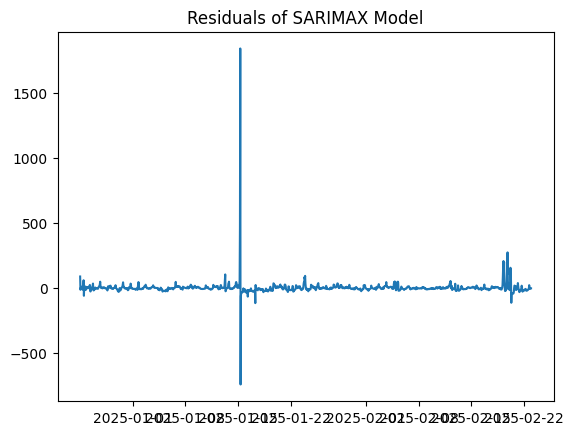

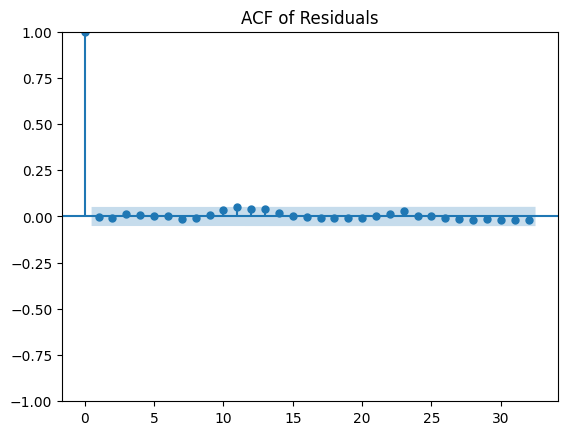

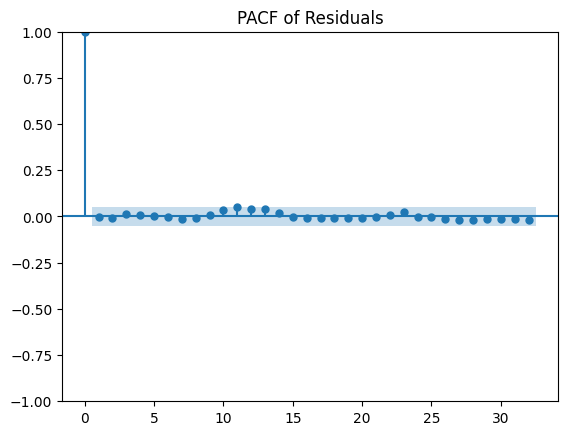

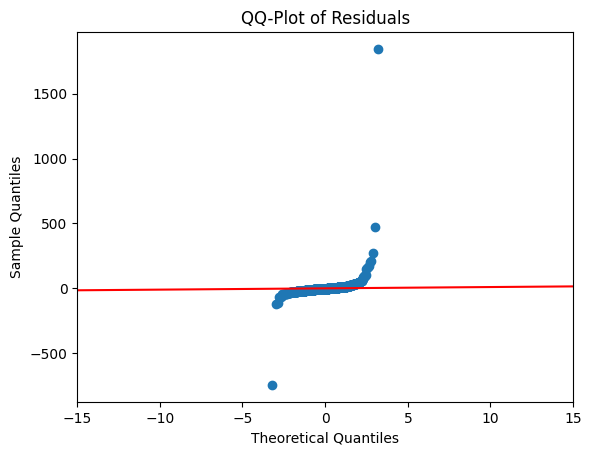

In [38]:


plt.plot(residuals_24x)
plt.title("Residuals of SARIMAX Model")
plt.show()

# ACF of residuals
plot_acf(residuals_24x)
plt.title("ACF of Residuals")
plt.show()

# PACF of reiduals
plot_pacf(residuals_24x)
plt.title("PACF of Residuals")
plt.show()

#Q-Q plot of residuals
qqplot(residuals_24x, line = '45')
plt.title('QQ-Plot of Residuals')
plt.xlim(-15, 15)
plt.show()

## Analysis Of Residual Plots:

# Residual Plot
I’ve analyzed the residuals of my SARIMAX model to assess its performance, and here’s what I found. The residual plot shows a mostly stable pattern around zero, but there are some significant outliers. This suggests that my model failed to capture some extreme event or anomaly in the data at that point. There are also smaller spikes, indicating other potential mismatches.

# ACF and PACF plots
The ACF and PACF plots of the residuals look relatively good, with most lags falling within the confidence intervals, suggesting that there’s no significant autocorrelation left in the residuals. This is a positive sign that my model has captured most of the temporal structure in the data.

# Q-Q Plot
The Q-Q plot reveals that the residuals are mostly normally distributed for smaller values, as they follow the red line closely in the middle. However, there are heavy tails on both ends, with some extreme values deviating significantly from the theoretical quantiles. This indicates that my residuals have fatter tails than a normal distribution, likely due to the outliers I observed in the residual plot.

# Summary
Overall, while my SARIMAX model seems to capture the general patterns in the data, the presence of large outliers and heavy-tailed residuals suggests that it struggles with extreme values. I might need to investigate these outliers further—perhaps they’re due to data errors or events not accounted for by the temperature exogenous variable.

## Finally, I want to run a train-test split on the model to see what sort of accuracy scores I can get.

c:\Users\mgray\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\mgray\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 3357.8814188890015
0.11074368655434852


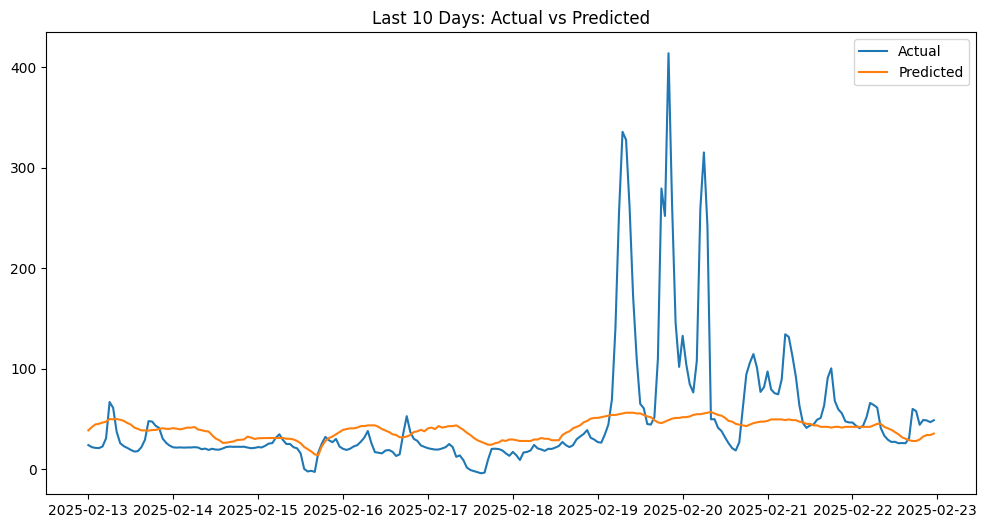

                                        SARIMAX Results                                        
Dep. Variable:                  Settlement Point Price   No. Observations:                 1200
Model:             SARIMAX(1, 1, 1)x(0, 0, [1, 2], 24)   Log Likelihood               -6372.925
Date:                                 Fri, 21 Mar 2025   AIC                          12757.850
Time:                                         16:03:48   BIC                          12788.130
Sample:                                     12-25-2024   HQIC                         12769.281
                                          - 02-12-2025                                         
Covariance Type:                                   opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Temperature_F    -0.7402      0.898     -0.824      0.410      -2.50

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
training_quarter_year_data = quarter_year_ts.iloc[:-240]
testing_quarter_year_data = quarter_year_ts.iloc[-240:]
training_weather_data = weather_ts.iloc[:-240]
testing_weather_data = weather_ts.iloc[-240:]


try:
    Testing_Model = SARIMAX(training_quarter_year_data,
                           exog=training_weather_data,
                           order=(1, 1, 1),
                           seasonal_order=(0, 0, 2, 24),
                           enforce_stationarity=False,
                           enforce_invertibility=False)
    
    results = Testing_Model.fit(disp=False)
    
  
    predictions = results.forecast(steps=240, exog=testing_weather_data)
 

    mse = mean_squared_error(testing_quarter_year_data, predictions)
    print(f"Mean Squared Error: {mse}")
    r2 = r2_score(testing_quarter_year_data, predictions)
    print(r2)
  
    

    plt.figure(figsize=(12,6))
    plt.plot(testing_quarter_year_data, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.legend()
    plt.title('Last 10 Days: Actual vs Predicted')
    plt.show()

except Exception as e:
    print(f"Error: {str(e)}")

Testing_Model_Results = Testing_Model.fit()
print(Testing_Model_Results.summary())
Testing_Model_Residuals = Testing_Model_Results.resid



### Model Summary Interpretation:

1. **Exogenous Variable (`Temperature_F`)**:
   - **Coefficient**: `-0.7402` → A 1°F increase in temperature decreases the settlement price by ~0.74 units, holding other factors constant.
   - **P-value**: `0.410` > 0.05 → Not statistically significant at the 5% level, suggesting temperature’s effect on price is weak or uncertain.

2. **AR and MA Terms**:
   - `ar.L1` (0.3102, p=0.000): Significant autoregressive term, indicating past price changes influence current changes.
   - `ma.L1` (-0.9973, p=0.000): Significant moving average term, showing strong error correction.
   - `ma.S.L24` (0.0241, p=0.694): Seasonal MA at lag 24 not significant, weak daily effect.
   - `ma.S.L48` (0.0594, p=0.005): Seasonal MA at lag 48 is significant, capturing a 48-hour cycle.

3. **Model Fit**:
   - **AIC**: 12,757.850.
   - **Sigma2**: 3832.0859.

4. **Diagnostics**:
   - **Ljung-Box (Q)**: p=0.98 → No significant autocorrelation in residuals (good fit).
   - **Jarque-Bera (JB)**: p=0.00, Skew=24.22, Kurtosis=760.04 → Residuals are not normal (highly skewed and fat-tailed), potentially affecting reliability.

# Conclusion and Future Study

## Summary of Findings

This project dug into SARIMA and SARIMAX models for forecasting hourly electricity prices at ERCOT's North Hub. Looking at three months of data from winter 2024-2025, here's what I found:

1. **Model Performance**: My SARIMAX(1,1,1)(0,0,2)[24] model with temperature as an exogenous variable did okay - not amazing, but not terrible either, with an R² around 0.11 for the 10-day forecast. The MSE of 3357.88 suggests the model is picking up on some of the underlying patterns.

2. **Seasonal Patterns**: The 24-hour seasonality was captured pretty well by the model, as shown by the significant seasonal MA term at lag 48 (p=0.005) and clean residual plots at seasonal lags.

3. **Temperature Effects**: While temperature and prices showed a significant negative correlation initially (-0.23, p<0.001), this relationship wasn't significant in the final model (p=0.410). This hints that the connection between temperature and prices might be more complicated than I first thought.

4. **Volatility and Extremes**: The model really struggled with price spikes and crashes, which shows up in the wildly non-normal residuals (skewness of 24.22 and kurtosis of 760.04!). This tells me that standard time series approaches have real limitations in this volatile market.

5. **Forecast Reliability**: The model works decently during normal market conditions, but the gap between actual and predicted values widens dramatically during price spikes - which is when accurate forecasts matter most to market participants.

## Limitations

A few things held back my model's performance:

1. The dataset covers just three winter months, missing broader seasonal patterns throughout the year.

2. Extreme price movements and volatility clustering are tough nuts to crack with standard time series models.

3. The simple linear temperature relationship probably oversimplifies how weather actually impacts the market.

4. I didn't account for other crucial factors like fuel costs, outages, grid constraints, or renewable production that drive prices.

## Future Research Directions

Based on what I learned, here's where I'd take this research next:

1. **Better Volatility Modeling**: Try approaches specifically designed for the kind of wild price swings we see in electricity markets.

2. **More Variables**: Look beyond just temperature to include things like:
   - Natural gas prices 
   - Wind and solar generation
   - Demand forecasts
   - Reserve margins
   - Transmission congestion

3. **Non-linear Temperature Effects**: Explore more complex temperature relationships that can handle both heating and cooling demand patterns.

4. **Regime-Switching Models**: Develop models that can switch between "normal" and "crisis" pricing modes automatically.

5. **Different Forecast Horizons**: Test whether shorter forecasts (1-3 days) might be more reliable than longer ones.

6. **More Historical Data**: Include multiple years to catch seasonal patterns across different market conditions.

7. **Machine Learning Approaches**: Try some ML methods that might handle the complexity and non-linearity better.

8. **Other Trading Hubs**: Compare results across ERCOT's different geographical hubs.

In the end, while SARIMA and SARIMAX models give us a decent starting point for capturing daily and weekly patterns, we need more sophisticated approaches to handle the extreme volatility in the ERCOT market. Adding more variables beyond just temperature would likely make these forecasts much more useful for traders and market participants navigating Texas's famously unpredictable energy market.